# PVSC 2021 Paper
### Electrification Futures BASE Installations, 
### with Module Composition Scenarios for 'TODAY' and 'Bifacial Projection';
### RELIABILITY APPROACHES: IRENA EL, IRENA RL, PV ICE
### And Bifaciality Factor Considerations PV ICE Same Installs and PV ICE Reduced Installs


In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'PVSC')

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PVSC


In [2]:
MATERIALS = ['glass','aluminium_frames','silver','silicon', 'copper']
MATERIAL = MATERIALS[0]

MODULEBASELINE = r'..\..\baselines\ElectrificationFutures_2021\baseline_modules_US_NREL_Electrification_Futures_2021_basecase.csv'


In [3]:
import PV_ICE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
PV_ICE.__version__

'0+untagged.404.gb10d1fc.dirty'

In [5]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

# Simulation 1: Regular PV ICE

In [6]:
MATERIALBASELINE_GLASS_TODAY = r'..\..\baselines\PVSC_2021\baseline_material_glass_hold2020.csv'
MATERIALBASELINE_ALFrames_TODAY = r'..\..\baselines\PVSC_2021\baseline_material_aluminium_frames_hold2020.csv'
MATERIALBASELINE_GLASS_BIFACIALPROJECTION = r'..\..\baselines\PVSC_2021\baseline_material_glass_bifacialTrend.csv'
MATERIALBASELINE_ALFrames_BIFACIALPROJECTION = r'..\..\baselines\PVSC_2021\baseline_material_aluminium_frames_bifacialTrend.csv'



In [7]:
r1 = PV_ICE.Simulation(name='PV_ICE', path=testfolder)

r1.createScenario(name='Today', file=MODULEBASELINE)
r1.scenario['Today'].addMaterial('glass', file=MATERIALBASELINE_GLASS_TODAY)
r1.scenario['Today'].addMaterial('aluminium_frames', file=MATERIALBASELINE_ALFrames_TODAY)
for mat in range (2, len(MATERIALS)):
    MATERIALBASELINE=r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['Today'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)
    
r1.createScenario(name='Bifacial', file=MODULEBASELINE)
r1.scenario['Bifacial'].addMaterial('glass', file=MATERIALBASELINE_GLASS_BIFACIALPROJECTION)
r1.scenario['Bifacial'].addMaterial('aluminium_frames', file=MATERIALBASELINE_ALFrames_BIFACIALPROJECTION)
for mat in range (2, len(MATERIALS)):
    MATERIALBASELINE=r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['Bifacial'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PVSC


In [8]:
MATERIALBASELINE_Mono = r'..\..\baselines\PVSC_2021\baseline_modules_US_ITRPVPrediction_monofacialModules.csv'
MATERIALBASELINE_Bifi = r'..\..\baselines\PVSC_2021\baseline_modules_US_ITRPVPrediction_bifacialModules.csv'
bifacialityfactors = r'..\..\baselines\baseline_bifaciality_factor.csv'

r0a = PV_ICE.Simulation(name='Mono', path=testfolder)

r0a.createScenario(name='Bifacial', file=MATERIALBASELINE_Mono)
r0a.scenario['Bifacial'].addMaterial('glass', file=MATERIALBASELINE_GLASS_TODAY)
r0a.scenario['Bifacial'].addMaterial('aluminium_frames', file=MATERIALBASELINE_ALFrames_TODAY)
for mat in range (2, len(MATERIALS)):
    MATERIALBASELINE=r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r0a.scenario['Bifacial'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

r0b = PV_ICE.Simulation(name='Bifacial_ReducedInstalls', path=testfolder)

r0b.createScenario(name='Bifacial', file=MATERIALBASELINE_Bifi)
r0b.scenario['Bifacial'].addMaterial('glass', file=MATERIALBASELINE_GLASS_BIFACIALPROJECTION)
r0b.scenario['Bifacial'].addMaterial('aluminium_frames', file=MATERIALBASELINE_ALFrames_BIFACIALPROJECTION)
for mat in range (2, len(MATERIALS)):
    MATERIALBASELINE=r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r0b.scenario['Bifacial'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PVSC
path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PVSC


In [9]:
r0c = PV_ICE.Simulation(name='Bifacial_SameInstalls', path=testfolder)

r0c.createScenario(name='Bifacial', file=MATERIALBASELINE_Bifi)
r0c.scenario['Bifacial'].addMaterial('glass', file=MATERIALBASELINE_GLASS_BIFACIALPROJECTION)
r0c.scenario['Bifacial'].addMaterial('aluminium_frames', file=MATERIALBASELINE_ALFrames_BIFACIALPROJECTION)
for mat in range (2, len(MATERIALS)):
    MATERIALBASELINE=r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r0c.scenario['Bifacial'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PVSC


In [10]:
# BifacialProjection.Bifacial --> now "Bifacial_ReducedInstalls.Bifacial"
# BifacialProjection.Mono --> now 'Mono.Bifacial'
# SameInstalls.Bifacial_SameInstalls --> now Bifacial_SameInstalls.Bifacial"

In [11]:
# Irena EL 
r2 = PV_ICE.Simulation(name='Irena_EL', path=testfolder)

r2.createScenario(name='Today', file=MODULEBASELINE)
r2.scenario['Today'].data['mod_lifetime'] = 40
r2.scenario['Today'].data['mod_MFG_eff'] = 100.0

r2.scenario['Today'].addMaterial('glass', file=MATERIALBASELINE_GLASS_TODAY)
r2.scenario['Today'].material['glass'].materialdata['mat_MFG_eff'] = 100.0   
r2.scenario['Today'].material['glass'].materialdata['mat_MFG_scrap_Recycled'] = 0.0 

r2.scenario['Today'].addMaterial('aluminium_frames', file=MATERIALBASELINE_ALFrames_TODAY)
r2.scenario['Today'].material['aluminium_frames'].materialdata['mat_MFG_eff'] = 100.0   
r2.scenario['Today'].material['aluminium_frames'].materialdata['mat_MFG_scrap_Recycled'] = 0.0 

for mat in range (2, len(MATERIALS)):
    MATERIALBASELINE=r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r2.scenario['Today'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)
    r2.scenario['Today'].material[MATERIALS[mat]].materialdata['mat_MFG_eff'] = 100.0   
    r2.scenario['Today'].material[MATERIALS[mat]].materialdata['mat_MFG_scrap_Recycled'] = 0.0
    

r2.createScenario(name='Bifacial', file=MODULEBASELINE)
r2.scenario['Bifacial'].data['mod_lifetime'] = 40
r2.scenario['Bifacial'].data['mod_MFG_eff'] = 100.0

r2.scenario['Bifacial'].addMaterial('glass', file=MATERIALBASELINE_GLASS_BIFACIALPROJECTION)
r2.scenario['Bifacial'].material['glass'].materialdata['mat_MFG_eff'] = 100.0   
r2.scenario['Bifacial'].material['glass'].materialdata['mat_MFG_scrap_Recycled'] = 0.0 

r2.scenario['Bifacial'].addMaterial('aluminium_frames', file=MATERIALBASELINE_ALFrames_BIFACIALPROJECTION)
r2.scenario['Bifacial'].material['aluminium_frames'].materialdata['mat_MFG_eff'] = 100.0   
r2.scenario['Bifacial'].material['aluminium_frames'].materialdata['mat_MFG_scrap_Recycled'] = 0.0 

for mat in range (2, len(MATERIALS)):
    MATERIALBASELINE=r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r2.scenario['Bifacial'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)
    r2.scenario['Bifacial'].material[MATERIALS[mat]].materialdata['mat_MFG_eff'] = 100.0   
    r2.scenario['Bifacial'].material[MATERIALS[mat]].materialdata['mat_MFG_scrap_Recycled'] = 0.0   


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PVSC


In [12]:
# Irena RL
r3 = PV_ICE.Simulation(name='Irena_RL', path=testfolder)

r3.createScenario(name='Today', file=MODULEBASELINE)
r3.scenario['Today'].data['mod_lifetime'] = 40
r3.scenario['Today'].data['mod_MFG_eff'] = 100.0

r3.scenario['Today'].addMaterial('glass', file=MATERIALBASELINE_GLASS_TODAY)
r3.scenario['Today'].material['glass'].materialdata['mat_MFG_eff'] = 100.0   
r3.scenario['Today'].material['glass'].materialdata['mat_MFG_scrap_Recycled'] = 0.0 

r3.scenario['Today'].addMaterial('aluminium_frames', file=MATERIALBASELINE_ALFrames_TODAY)
r3.scenario['Today'].material['aluminium_frames'].materialdata['mat_MFG_eff'] = 100.0   
r3.scenario['Today'].material['aluminium_frames'].materialdata['mat_MFG_scrap_Recycled'] = 0.0 

for mat in range (2, len(MATERIALS)):
    MATERIALBASELINE=r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r3.scenario['Today'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)
    r3.scenario['Today'].material[MATERIALS[mat]].materialdata['mat_MFG_eff'] = 100.0   
    r3.scenario['Today'].material[MATERIALS[mat]].materialdata['mat_MFG_scrap_Recycled'] = 0.0
    

r3.createScenario(name='Bifacial', file=MODULEBASELINE)
r3.scenario['Bifacial'].data['mod_lifetime'] = 40
r3.scenario['Bifacial'].data['mod_MFG_eff'] = 100.0

r3.scenario['Bifacial'].addMaterial('glass', file=MATERIALBASELINE_GLASS_BIFACIALPROJECTION)
r3.scenario['Bifacial'].material['glass'].materialdata['mat_MFG_eff'] = 100.0   
r3.scenario['Bifacial'].material['glass'].materialdata['mat_MFG_scrap_Recycled'] = 0.0 

r3.scenario['Bifacial'].addMaterial('aluminium_frames', file=MATERIALBASELINE_ALFrames_BIFACIALPROJECTION)
r3.scenario['Bifacial'].material['aluminium_frames'].materialdata['mat_MFG_eff'] = 100.0   
r3.scenario['Bifacial'].material['aluminium_frames'].materialdata['mat_MFG_scrap_Recycled'] = 0.0 

for mat in range (2, len(MATERIALS)):
    MATERIALBASELINE=r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r3.scenario['Bifacial'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)
    r3.scenario['Bifacial'].material[MATERIALS[mat]].materialdata['mat_MFG_eff'] = 100.0   
    r3.scenario['Bifacial'].material[MATERIALS[mat]].materialdata['mat_MFG_scrap_Recycled'] = 0.0
    


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PVSC


# Run Simulations 

In [13]:
r0a.calculateMassFlow() # Mono.Bifacial
r0b.calculateMassFlow(bifacialityfactors=bifacialityfactors) #  Bifacial_ReducedInstalls.Bifacial
r0c.calculateMassFlow(bifacialityfactors=bifacialityfactors, reducecapacity=False) # Bifacial_SameInstalls.Bifacial
r1.calculateMassFlow()

Working on Scenario:  Bifacial
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
Working on Scenario:  Bifacial
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
Working on Scenario:  Bifacial
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
Working on Scenario:  Today
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==

In [14]:
weibullInputParams = {'alpha': 2.49, 'beta':30}  # Early-loss scenario IRENA
r2.calculateMassFlow(weibullInputParams=weibullInputParams)

weibullInputParams = {'alpha': 5.3759, 'beta':30}  # Regular-loss scenario IRENA
r3.calculateMassFlow(weibullInputParams=weibullInputParams)


Working on Scenario:  Today
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
Working on Scenario:  Bifacial
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
Working on Scenario:  Today
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
Working on Scenario:  Bifacial
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> W

## Creating Summary of results 


In [15]:
Simulations = [r0a, r0b, r0c, r1, r2, r3]

In [16]:
USyearly=pd.DataFrame()

In [17]:
keyword='mat_Total_Landfilled'
materials = ['glass', 'aluminium_frames','silicon', 'silver', 'copper']

# Loop over objects
for kk in range(0, len(Simulations)):
    obj = Simulations[kk]      
    
    # Loop over Scenarios
    for jj in range(0, len(obj.scenario)):
        case = list(obj.scenario.keys())[jj]

        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["Waste_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(obj.name+'_'+case)) ]
        USyearly['Waste_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)


In [18]:
keyword='mat_Total_EOL_Landfilled'
materials = ['glass', 'aluminium_frames','silicon', 'silver', 'copper']

# Loop over objects
for kk in range(0, len(Simulations)):
    obj = Simulations[kk]

    # Loop over Scenarios
    for jj in range(0, len(obj.scenario)):
        case = list(obj.scenario.keys())[jj]

        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["Waste_EOL_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(obj.name+'_'+case)) ]
        USyearly['Waste_EOL_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)



In [19]:
keyword='mat_Total_MFG_Landfilled'
materials = ['glass', 'aluminium_frames','silicon', 'silver', 'copper']

# Loop over objects
for kk in range(0, len(Simulations)):
    obj = Simulations[kk]

    # Loop over Scenarios
    for jj in range(0, len(obj.scenario)):
        case = list(obj.scenario.keys())[jj]

        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["Waste_MFG_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(obj.name+'_'+case)) ]
        USyearly['Waste_MFG_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)



In [20]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'aluminium_frames','silicon', 'silver', 'copper']

# Loop over objects
for kk in range(0, len(Simulations)):
    obj = Simulations[kk]

    # Loop over Scenarios
    for jj in range(0, len(obj.scenario)):
        case = list(obj.scenario.keys())[jj]

        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["VirginStock_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(obj.name+'_'+case)) ]
        USyearly['VirginStock_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)



### Converting to grams to METRIC Tons. 


In [21]:
USyearly = USyearly/1000000  # This is the ratio for Metric tonnes
#907185 -- this is for US tons


### Adding NEW Installed Capacity to US

In [22]:
keyword='new_Installed_Capacity_[MW]'

# Loop over objects
for kk in range(0, len(Simulations)):
    obj = Simulations[kk]
    newcolname = keyword+'_'+obj.name
    
    if newcolname in USyearly:
        USyearly[newcolname] = USyearly[newcolname]+obj.scenario[list(obj.scenario.keys())[0]].data[keyword]
    else:
        USyearly[keyword+'_'+obj.name] = obj.scenario[list(obj.scenario.keys())[0]].data[keyword]

USyearly.head(10)

,Waste_glass_Mono_Bifacial,Waste_aluminium_frames_Mono_Bifacial,Waste_silicon_Mono_Bifacial,Waste_silver_Mono_Bifacial,Waste_copper_Mono_Bifacial,Waste_Module_Mono_Bifacial,Waste_glass_Bifacial_ReducedInstalls_Bifacial,Waste_aluminium_frames_Bifacial_ReducedInstalls_Bifacial,Waste_silicon_Bifacial_ReducedInstalls_Bifacial,Waste_silver_Bifacial_ReducedInstalls_Bifacial,...,VirginStock_silicon_Irena_RL_Bifacial,VirginStock_silver_Irena_RL_Bifacial,VirginStock_copper_Irena_RL_Bifacial,VirginStock_Module_Irena_RL_Bifacial,new_Installed_Capacity_[MW]_Mono,new_Installed_Capacity_[MW]_Bifacial_ReducedInstalls,new_Installed_Capacity_[MW]_Bifacial_SameInstalls,new_Installed_Capacity_[MW]_PV_ICE,new_Installed_Capacity_[MW]_Irena_EL,new_Installed_Capacity_[MW]_Irena_RL
0,35.574651,3.797870,70.644070,0.190322,0.002848,110.209761,0.0,0.0,0.0,0.0,...,84.842143,8.800000,0.537600,0.000000,12.500000,0.0,0.0,12.500000,12.500000,12.500000
1,27.083240,2.823082,52.722477,0.139265,0.002170,82.770233,0.0,0.0,0.0,0.0,...,63.318323,6.437861,0.409239,0.000162,9.667667,0.0,0.0,9.667667,9.667667,9.667667
2,32.157941,3.015525,61.250645,0.159002,0.002610,96.585723,0.0,0.0,0.0,0.0,...,73.553364,7.321757,0.485092,0.006845,11.622000,0.0,0.0,11.622000,11.622000,11.622000
3,32.468039,2.960336,60.017556,0.155840,0.002828,95.604599,0.0,0.0,0.0,0.0,...,72.031369,7.010352,0.484951,0.064677,11.781000,0.0,0.0,11.781000,11.781000,11.781000
4,46.813626,4.447433,83.179517,0.221035,0.004625,134.666236,0.0,0.0,0.0,0.0,...,99.711171,9.473486,0.685589,0.330062,16.884667,0.0,0.0,16.884667,16.884667,16.884667
5,59.565837,6.229870,99.797207,0.198543,0.007252,165.798708,0.0,0.0,0.0,0.0,...,119.329226,7.071494,0.838314,1.194987,20.926667,0.0,0.0,20.926667,20.926667,20.926667
6,82.722903,9.677156,129.280686,0.297994,0.012400,221.991139,0.0,0.0,0.0,0.0,...,154.042433,8.879946,1.106231,3.470416,27.985000,0.0,0.0,27.985000,27.985000,27.985000
7,129.411801,16.288027,190.718124,0.488621,0.022068,336.928640,0.0,0.0,0.0,0.0,...,226.575681,12.678828,1.664096,8.643395,42.476000,0.0,0.0,42.476000,42.476000,42.476000
8,188.717650,25.714931,260.793459,0.752367,0.036466,476.014873,0.0,0.0,0.0,0.0,...,308.699511,16.729148,2.319986,19.225951,59.745000,0.0,0.0,59.745000,59.745000,59.745000
9,300.242888,41.223945,410.905403,1.188847,0.059776,753.620860,0.0,0.0,0.0,0.0,...,474.008752,24.810616,3.647161,39.219203,94.752000,0.0,0.0,94.752000,94.752000,94.752000


# Combining BifacialProjection

In [23]:
filter_col_Bifacial_ReducedInstalls = [col for col in USyearly if col.endswith('Bifacial_ReducedInstalls_Bifacial')]
filter_col_Mono = [col for col in USyearly if col.endswith('Mono_Bifacial')]
filter_col_Bifacial_SameInstalls = [col for col in USyearly if col.endswith('Bifacial_SameInstalls_Bifacial')]

In [24]:
new_col_titles = filter_col_Bifacial_ReducedInstalls.copy()
new_col_titles = [x[:-9] for x in new_col_titles]
df_Bifacial_ReducedInstalls = pd.DataFrame(USyearly[filter_col_Bifacial_ReducedInstalls].values + USyearly[filter_col_Mono].values, columns=new_col_titles)
USyearly = pd.concat([USyearly, df_Bifacial_ReducedInstalls], axis=1)
USyearly = USyearly[USyearly.columns.drop(filter_col_Bifacial_ReducedInstalls)]


In [25]:
new_col_titles = filter_col_Bifacial_SameInstalls.copy()
new_col_titles = [x[:-9] for x in new_col_titles]
df_Bifacial_SameInstalls = pd.DataFrame(USyearly[filter_col_Bifacial_SameInstalls].values + USyearly[filter_col_Mono].values, columns=new_col_titles)
USyearly = pd.concat([USyearly, df_Bifacial_SameInstalls], axis=1)
USyearly = USyearly[USyearly.columns.drop(filter_col_Bifacial_SameInstalls)]


In [26]:
USyearly = USyearly[USyearly.columns.drop(filter_col_Mono)]

### Creating Cuulatives 

In [27]:
UScum = USyearly.copy()
UScum = UScum.cumsum()
UScum.head()

,Waste_glass_PV_ICE_Today,Waste_aluminium_frames_PV_ICE_Today,Waste_silicon_PV_ICE_Today,Waste_silver_PV_ICE_Today,Waste_copper_PV_ICE_Today,Waste_Module_PV_ICE_Today,Waste_glass_PV_ICE_Bifacial,Waste_aluminium_frames_PV_ICE_Bifacial,Waste_silicon_PV_ICE_Bifacial,Waste_silver_PV_ICE_Bifacial,...,Waste_MFG_silicon_Bifacial_SameInstalls,Waste_MFG_silver_Bifacial_SameInstalls,Waste_MFG_copper_Bifacial_SameInstalls,Waste_MFG_Module_Bifacial_SameInstalls,VirginStock_glass_Bifacial_SameInstalls,VirginStock_aluminium_frames_Bifacial_SameInstalls,VirginStock_silicon_Bifacial_SameInstalls,VirginStock_silver_Bifacial_SameInstalls,VirginStock_copper_Bifacial_SameInstalls,VirginStock_Module_Bifacial_SameInstalls
0,35.574651,3.797870,70.644070,0.190322,0.002848,110.209761,35.574651,3.797870,70.644070,0.190322,...,70.644070,0.190322,0.002848,551.048805,858.816756,312.916411,173.147230,10.735207,0.590784,1102.097610
1,62.657891,6.620951,123.366547,0.329587,0.005018,192.979994,62.657891,6.620951,123.366547,0.329587,...,123.366265,0.329558,0.005016,964.903914,1512.576923,545.434342,302.368298,18.588818,1.040508,1929.807828
2,94.815832,9.636476,184.617192,0.488589,0.007628,289.565717,94.815832,9.636476,184.617192,0.488589,...,184.610699,0.487909,0.007586,1447.919592,2287.512338,792.055903,452.477204,27.520702,1.573415,2895.839185
3,127.283871,12.596813,244.634747,0.644429,0.010456,385.170316,127.283871,12.596813,244.634747,0.644429,...,244.587839,0.639526,0.010156,1926.509655,3062.222820,1024.026364,599.479998,36.072700,2.106354,3853.019310
4,174.097497,17.044245,327.814264,0.865463,0.015082,519.836552,174.097497,17.044245,327.814264,0.865463,...,327.612651,0.844414,0.013788,2602.013126,4157.451641,1344.773035,802.972184,47.629499,2.859925,5204.026252


### Adding Installed Capacity to US

In [28]:
keyword='Installed_Capacity_[W]'

# Loop over objects
for kk in range(0, len(Simulations)):
    obj = Simulations[kk]

    # Loop over Scenarios
    for jj in range(0, len(obj.scenario)):
        case = list(obj.scenario.keys())[jj]
        foo = obj.scenario[case].data[keyword]
        foo = foo.to_frame(name=keyword)
        UScum["Capacity_"+obj.name+'_'+case] = foo[keyword]
        
        

In [29]:
UScum['Capacity_Bifacial_ReducedInstalls'] = UScum['Capacity_Mono_Bifacial'] + UScum['Capacity_Bifacial_ReducedInstalls_Bifacial']
UScum['Capacity_Bifacial_SameInstalls'] = UScum['Capacity_Mono_Bifacial'] + UScum['Capacity_Bifacial_SameInstalls_Bifacial']

In [30]:
UScum = UScum[UScum.columns.drop(['Capacity_Mono_Bifacial','Capacity_Bifacial_ReducedInstalls_Bifacial', 'Capacity_Bifacial_SameInstalls_Bifacial'])]


### Reindexing

In [31]:
USyearly.index = r1.scenario['Today'].data['year']
UScum.index = r1.scenario['Today'].data['year']

In [32]:
UScum.tail(5)

,Waste_glass_PV_ICE_Today,Waste_aluminium_frames_PV_ICE_Today,Waste_silicon_PV_ICE_Today,Waste_silver_PV_ICE_Today,Waste_copper_PV_ICE_Today,Waste_Module_PV_ICE_Today,Waste_glass_PV_ICE_Bifacial,Waste_aluminium_frames_PV_ICE_Bifacial,Waste_silicon_PV_ICE_Bifacial,Waste_silver_PV_ICE_Bifacial,...,VirginStock_copper_Bifacial_SameInstalls,VirginStock_Module_Bifacial_SameInstalls,Capacity_PV_ICE_Today,Capacity_PV_ICE_Bifacial,Capacity_Irena_EL_Today,Capacity_Irena_EL_Bifacial,Capacity_Irena_RL_Today,Capacity_Irena_RL_Bifacial,Capacity_Bifacial_ReducedInstalls,Capacity_Bifacial_SameInstalls
year,,,,,,,,,,,,,,,,,,,,,
2046,4.396966e+06,698331.949871,689376.007190,2547.727614,3166.399345,5.790388e+06,4.520391e+06,670914.512113,689376.007190,2547.727614,...,30160.030829,6.726700e+07,7.623053e+11,7.623053e+11,4.574685e+11,4.574685e+11,6.645148e+11,6.645148e+11,7.622999e+11,7.934824e+11
2047,4.773587e+06,753679.917186,723059.434807,2688.785236,3500.325645,6.256515e+06,4.913006e+06,721343.705408,723059.434807,2688.785236,...,31496.851040,7.281064e+07,7.957611e+11,7.957611e+11,4.691530e+11,4.691530e+11,6.827827e+11,6.827827e+11,7.957537e+11,8.286424e+11
2048,5.198578e+06,815888.025306,758360.201272,2842.087220,3880.290336,6.779549e+06,5.357461e+06,777400.575324,758360.201272,2842.087220,...,32830.186141,7.904722e+07,8.280213e+11,8.280213e+11,4.808609e+11,4.808609e+11,6.995041e+11,6.995041e+11,8.280139e+11,8.625626e+11
2049,5.700316e+06,888764.493951,803796.805706,3017.506517,4324.144292,7.400219e+06,5.885139e+06,842251.459746,803796.805706,3017.506517,...,34703.318687,8.643624e+07,8.769674e+11,8.769674e+11,5.109220e+11,5.109220e+11,7.328876e+11,7.328876e+11,8.769571e+11,9.139316e+11
2050,6.263975e+06,970797.266963,851507.984932,3211.303418,4825.939108,8.094317e+06,6.479219e+06,914761.801274,851507.984932,3211.303418,...,36571.877672,9.472021e+07,9.243795e+11,9.243795e+11,5.410761e+11,5.410761e+11,7.646611e+11,7.646611e+11,9.243691e+11,9.637174e+11


In [33]:
UScum.to_csv('Cumulative_Results.csv')
USyearly.to_csv('Yearly_Results.csv')

## Mining Capacity

In [34]:
mining2020_aluminum = 65267000
mining2020_silver = 22260
mining2020_copper = 20000000
mining2020_silicon = 8000000

# PLOTTING GALORE

In [35]:
list(USyearly.keys())

['Waste_glass_PV_ICE_Today',
 'Waste_aluminium_frames_PV_ICE_Today',
 'Waste_silicon_PV_ICE_Today',
 'Waste_silver_PV_ICE_Today',
 'Waste_copper_PV_ICE_Today',
 'Waste_Module_PV_ICE_Today',
 'Waste_glass_PV_ICE_Bifacial',
 'Waste_aluminium_frames_PV_ICE_Bifacial',
 'Waste_silicon_PV_ICE_Bifacial',
 'Waste_silver_PV_ICE_Bifacial',
 'Waste_copper_PV_ICE_Bifacial',
 'Waste_Module_PV_ICE_Bifacial',
 'Waste_glass_Irena_EL_Today',
 'Waste_aluminium_frames_Irena_EL_Today',
 'Waste_silicon_Irena_EL_Today',
 'Waste_silver_Irena_EL_Today',
 'Waste_copper_Irena_EL_Today',
 'Waste_Module_Irena_EL_Today',
 'Waste_glass_Irena_EL_Bifacial',
 'Waste_aluminium_frames_Irena_EL_Bifacial',
 'Waste_silicon_Irena_EL_Bifacial',
 'Waste_silver_Irena_EL_Bifacial',
 'Waste_copper_Irena_EL_Bifacial',
 'Waste_Module_Irena_EL_Bifacial',
 'Waste_glass_Irena_RL_Today',
 'Waste_aluminium_frames_Irena_RL_Today',
 'Waste_silicon_Irena_RL_Today',
 'Waste_silver_Irena_RL_Today',
 'Waste_copper_Irena_RL_Today',
 'Waste_Mo

Text(0, 0.5, 'Virgin material needs as a percentage of \n 2020 global mining production capacity [%]')

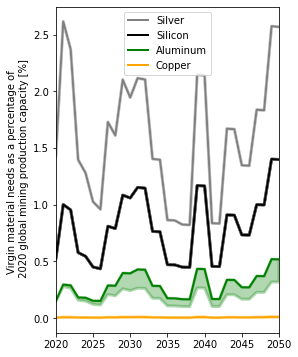

In [36]:
#VirginStock_glass_PVSC_Today
#VirginStock_glass_PVSC_Bifacial

plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keyw='VirginStock_'
materials = ['glass', 'silicon','silver', 'copper', 'aluminium_frames']

fig, axs = plt.subplots(1,1, figsize=(4, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)


# Loop over CASES
name2 = 'PV_ICE_Today'
name0 = 'PV_ICE_Bifacial'
# ROW 2, Aluminum and Silicon:        g-  4 aluminum k - 1 silicon   orange - 3 copper  gray - 2 silver
axs.plot(USyearly[keyw+materials[2]+'_'+name2]*100/mining2020_silver, 
         color = 'gray', linewidth=2.0, label='Silver')

axs.fill_between(USyearly.index, USyearly[keyw+materials[2]+'_'+name0]*100/mining2020_silver, 
                 USyearly[keyw+materials[2]+'_'+name2]*100/mining2020_silver,
                   color='gray', lw=3, alpha=.3)
    

axs.plot(USyearly[keyw+materials[1]+'_'+name2]*100/mining2020_silicon, 
         color = 'k', linewidth=2.0, label='Silicon')
axs.fill_between(USyearly.index, USyearly[keyw+materials[1]+'_'+name0]*100/mining2020_silicon, 
                                USyearly[keyw+materials[1]+'_'+name2]*100/mining2020_silicon,
                   color='k', lw=3, alpha=.5)



axs.plot(USyearly[keyw+materials[4]+'_'+name2]*100/mining2020_aluminum, 
         color = 'g', linewidth=2.0, label='Aluminum')

axs.fill_between(USyearly.index, USyearly[keyw+materials[4]+'_'+name0]*100/mining2020_aluminum, 
                                USyearly[keyw+materials[4]+'_'+name2]*100/mining2020_aluminum,
                   color='g', lw=3, alpha=.3)



axs.plot(USyearly[keyw+materials[3]+'_'+name2]*100/mining2020_copper, 
         color = 'orange', linewidth=2.0, label='Copper')

axs.fill_between(USyearly.index, USyearly[keyw+materials[3]+'_'+name0]*100/mining2020_copper, 
                                USyearly[keyw+materials[3]+'_'+name2]*100/mining2020_copper,
                   color='orange', lw=3, alpha=.3)



axs.set_xlim([2020,2050])
axs.legend()
#axs.set_yscale('log')

axs.set_ylabel('Virgin material needs as a percentage of \n 2020 global mining production capacity [%]')

#fig.savefig(os.path.join(testfolder,'Fig_1x1_MaterialNeeds Ratio to Production_NREL2018.png'), dpi=600)



In [37]:
bifacial_foo = USyearly[keyw+materials[4]+'_'+name0].iloc[-1]*100/mining2020_aluminum
today_foo = USyearly[keyw+materials[4]+'_'+name2].iloc[-1]*100/mining2020_aluminum
print(today_foo)
print(bifacial_foo)
print("In Year 2050, AL Needs Ratio to Mining Supply REDUCTION Of ", (today_foo-bifacial_foo)*100/today_foo-bifacial_foo)

0.5170513386557751
0.3165039339997314
In Year 2050, AL Needs Ratio to Mining Supply REDUCTION Of  38.47024501387551


In [38]:
bifacial_foo = USyearly[keyw+materials[4]+'_'+name0].sum()*100/mining2020_aluminum
today_foo = USyearly[keyw+materials[4]+'_'+name2].sum()*100/mining2020_aluminum
print(today_foo)
print(bifacial_foo)
print("Cumulative 2020-2050 AL Needs Ratio to Mining Supply REDUCTION Of ", (today_foo-bifacial_foo)*100/today_foo-bifacial_foo)

9.901730223814619
6.836916462770487
Cumulative 2020-2050 AL Needs Ratio to Mining Supply REDUCTION Of  24.115388758320655


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


Cumulative Virgin Needs by 2050 Million Tones by Scenario


0    52.484086
1    57.475416
dtype: float64

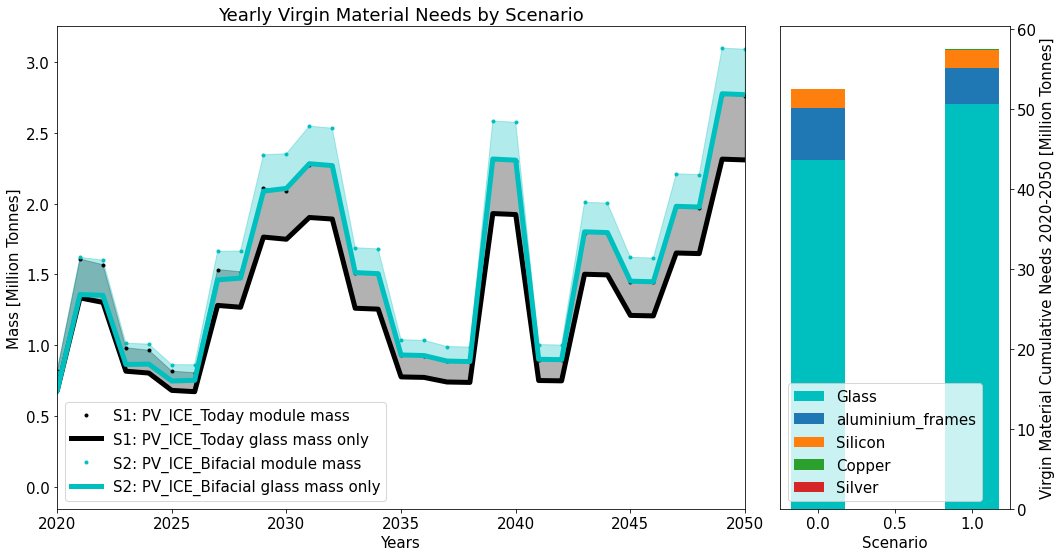

In [39]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='VirginStock_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'PV_ICE_Today'
name2 = 'PV_ICE_Bifacial'


# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k.', linewidth=5, label='S1: '+name0+' module mass')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='S1: '+name0+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'c.', linewidth=5, label='S2: '+name2+' module mass')
a0.plot(USyearly.index, glassmat, 'c', linewidth=5, label='S2: '+name2+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly Virgin Material Needs by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
    
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Virgin Material Cumulative Needs 2020-2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))

f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly Virgin Material Needs by Scenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Virgin Needs by 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


Cumulative Waste by EoL 2050 Million Tones by Scenario


0    6.493663
1    6.547684
dtype: float64

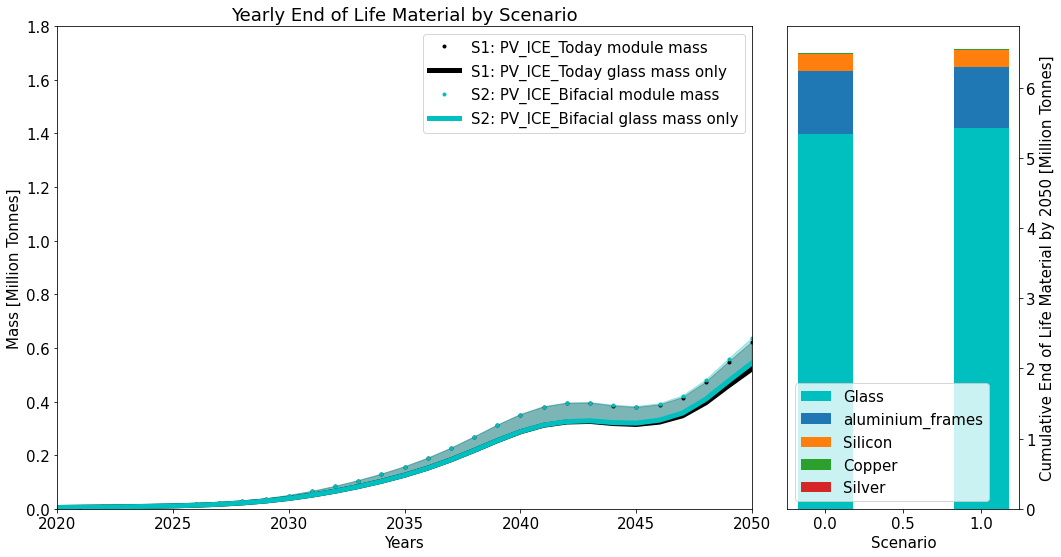

In [40]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_EOL_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'PV_ICE_Today'
name2 = 'PV_ICE_Bifacial'

# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k.', linewidth=5, label='S1: '+name0+' module mass')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='S1: '+name0+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'c.', linewidth=5, label='S2: '+name2+' module mass')
a0.plot(USyearly.index, glassmat, 'c', linewidth=5, label='S2: '+name2+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))

f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly EoL Waste by SCenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


# Waste_ EOL 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:154: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:166: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


Cumulative Waste by EoL 2050 Million Tones by Scenario
Cumulative Waste by EoL 2050 Million Tones by Scenario


0    27.407558
1     0.000000
2     0.000000
dtype: float64

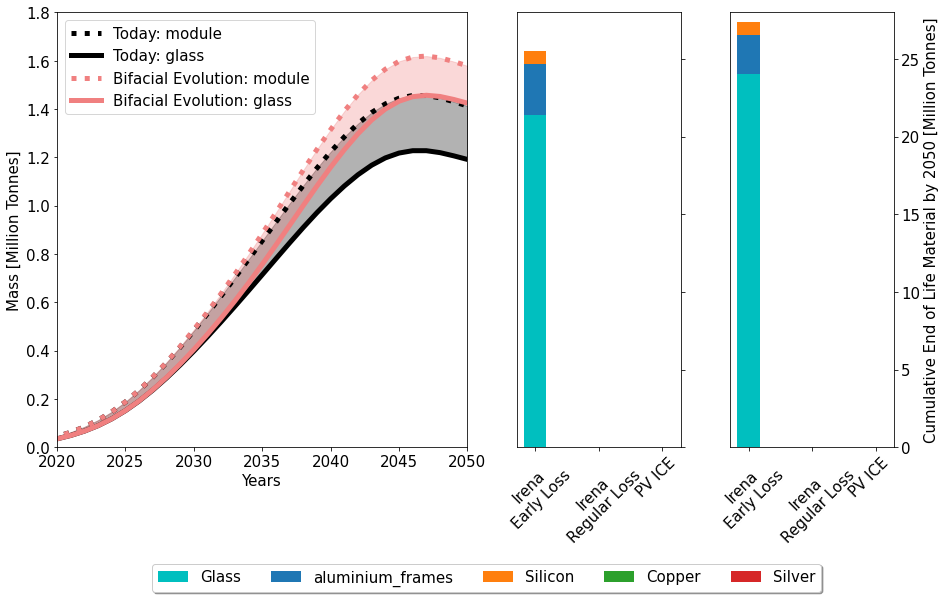

In [41]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_EOL_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,0.8,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'Irena_EL_Today'
name2 = 'Irena_EL_Bifacial'

# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k', linestyle='dotted', linewidth=5, label='Today: module')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='Today: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Bifacial Evolution: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Bifacial Evolution: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

a0.legend()
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050_Prev_A = dfcumulations2050.copy()


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
#a1.yaxis.set_visible(False)
a1.yaxis.set_ticklabels([]) 
#a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)



print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



########################    
# SUBPLOT 3
########################
#######################
# Calculate    


cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050_Prev_B = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a2.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a2.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a2.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a2.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a2.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a2.yaxis.set_label_position("right")
a2.yaxis.tick_right()
a2.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a2.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a2.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'),
          bbox_to_anchor=(0.6, -0.25),
          fancybox=True, shadow=True, ncol=5)
a2.set_ylim([0, 28])

plt.sca(a2)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)


f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly EoL Waste by SCenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:157: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:169: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


Cumulative Waste by EoL 2050 Million Tones by Scenario
Cumulative Waste by EoL 2050 Million Tones by Scenario


0    27.407558
1    15.436708
2     0.000000
dtype: float64

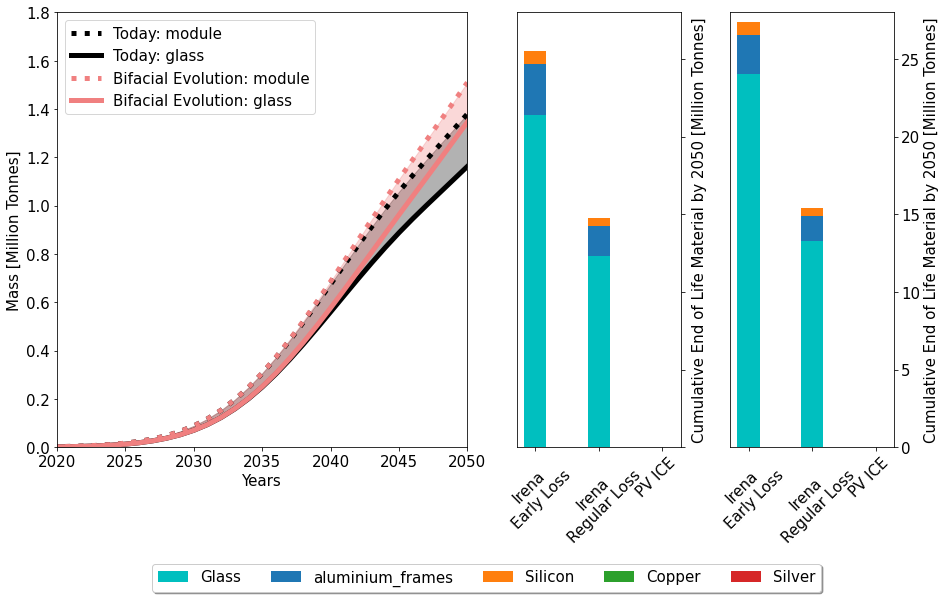

In [42]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_EOL_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,0.8,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'Irena_RL_Today'
name2 = 'Irena_RL_Bifacial'

# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k', linestyle='dotted', linewidth=5, label='Today: module')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='Today: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Bifacial Evolution: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Bifacial Evolution: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

a0.legend()
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050.iloc[1] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_A.iloc[0]

dfcumulations2050_Prev_A = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.yaxis.set_ticklabels([]) 
a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)



print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)

########################    
# SUBPLOT 3
########################
#######################
# Calculate    


cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


dfcumulations2050.iloc[1] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_B.iloc[0]

dfcumulations2050_Prev_B = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a2.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a2.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a2.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a2.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a2.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a2.yaxis.set_label_position("right")
a2.yaxis.tick_right()
a2.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a2.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a2.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'),
          bbox_to_anchor=(0.6, -0.25),
          fancybox=True, shadow=True, ncol=5)
a2.set_ylim([0, 28])

plt.sca(a2)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)


f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly EoL Waste by SCenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



In [43]:
list(USyearly.keys())

['Waste_glass_PV_ICE_Today',
 'Waste_aluminium_frames_PV_ICE_Today',
 'Waste_silicon_PV_ICE_Today',
 'Waste_silver_PV_ICE_Today',
 'Waste_copper_PV_ICE_Today',
 'Waste_Module_PV_ICE_Today',
 'Waste_glass_PV_ICE_Bifacial',
 'Waste_aluminium_frames_PV_ICE_Bifacial',
 'Waste_silicon_PV_ICE_Bifacial',
 'Waste_silver_PV_ICE_Bifacial',
 'Waste_copper_PV_ICE_Bifacial',
 'Waste_Module_PV_ICE_Bifacial',
 'Waste_glass_Irena_EL_Today',
 'Waste_aluminium_frames_Irena_EL_Today',
 'Waste_silicon_Irena_EL_Today',
 'Waste_silver_Irena_EL_Today',
 'Waste_copper_Irena_EL_Today',
 'Waste_Module_Irena_EL_Today',
 'Waste_glass_Irena_EL_Bifacial',
 'Waste_aluminium_frames_Irena_EL_Bifacial',
 'Waste_silicon_Irena_EL_Bifacial',
 'Waste_silver_Irena_EL_Bifacial',
 'Waste_copper_Irena_EL_Bifacial',
 'Waste_Module_Irena_EL_Bifacial',
 'Waste_glass_Irena_RL_Today',
 'Waste_aluminium_frames_Irena_RL_Today',
 'Waste_silicon_Irena_RL_Today',
 'Waste_silver_Irena_RL_Today',
 'Waste_copper_Irena_RL_Today',
 'Waste_Mo

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:113: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:176: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


Cumulative Waste by EoL 2050 Million Tones by Scenario


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:187: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


Cumulative Waste by EoL 2050 Million Tones by Scenario


0    27.407558
1    15.436708
2     6.547684
dtype: float64

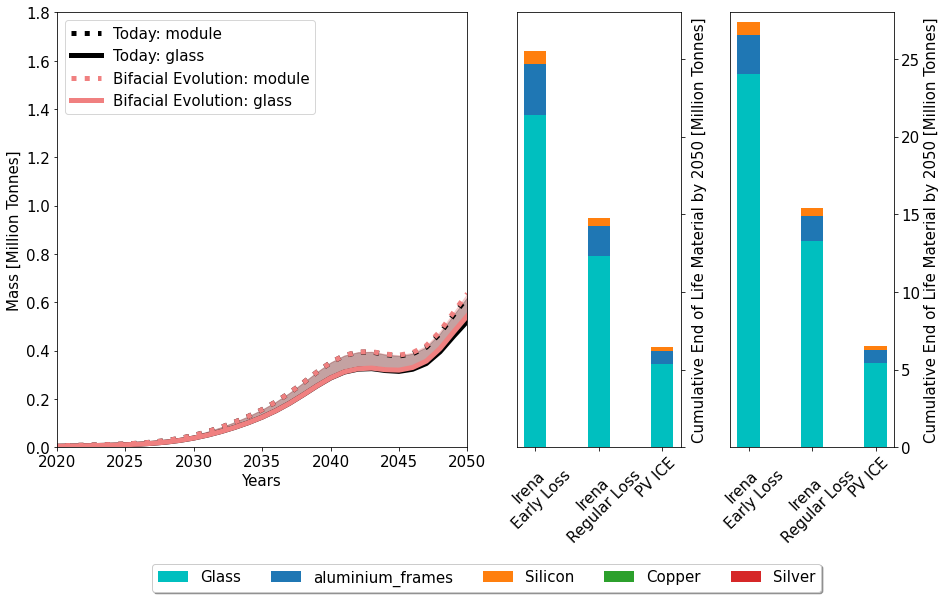

In [44]:

plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_EOL_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,0.8,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'PV_ICE_Today'
name2 = 'PV_ICE_Bifacial'
#name3 = 'BifacialProjection'

# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k', linestyle='dotted', linewidth=5, label='Today: module')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='Today: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Bifacial Evolution: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Bifacial Evolution: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

'''
# SCENARIO 3 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name3]+USyearly[keyw+materials[1]+'_'+name3]+
            USyearly[keyw+materials[2]+'_'+name3]+USyearly[keyw+materials[3]+'_'+name3]+
            USyearly[keyw+materials[4]+'_'+name3])
glassmat = (USyearly[keyw+materials[0]+'_'+name3])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'g', linestyle='dotted', linewidth=5, label='Bifacial Evolution: module')
a0.plot(USyearly.index, glassmat, 'g', linewidth=5, label='Bifacial Evolution: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

'''

a0.legend(loc=2)
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050.iloc[2] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_A.iloc[0]
dfcumulations2050.iloc[1] = dfcumulations2050_Prev_A.iloc[1]

dfcumulations2050_Prev_A = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.yaxis.set_ticklabels([]) 

a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
a1.yaxis.set_ticklabels([]) 
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


########################    
# SUBPLOT 3
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


dfcumulations2050.iloc[2] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_B.iloc[0]
dfcumulations2050.iloc[1] = dfcumulations2050_Prev_B.iloc[1]

dfcumulations2050_Prev_B = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a2.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a2.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a2.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a2.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a2.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a2.yaxis.set_label_position("right")
a2.yaxis.tick_right()
a2.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a2.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a2.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'),
          bbox_to_anchor=(0.6, -0.25),
          fancybox=True, shadow=True, ncol=5)
a2.set_ylim([0, 28])

plt.sca(a2)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)

f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly EoL Waste by SCenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:119: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:184: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


Cumulative Waste by EoL 2050 Million Tones by Scenario


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:196: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


Cumulative Waste by EoL 2050 Million Tones by Scenario


0    27.407558
1    15.436708
2     6.547684
dtype: float64

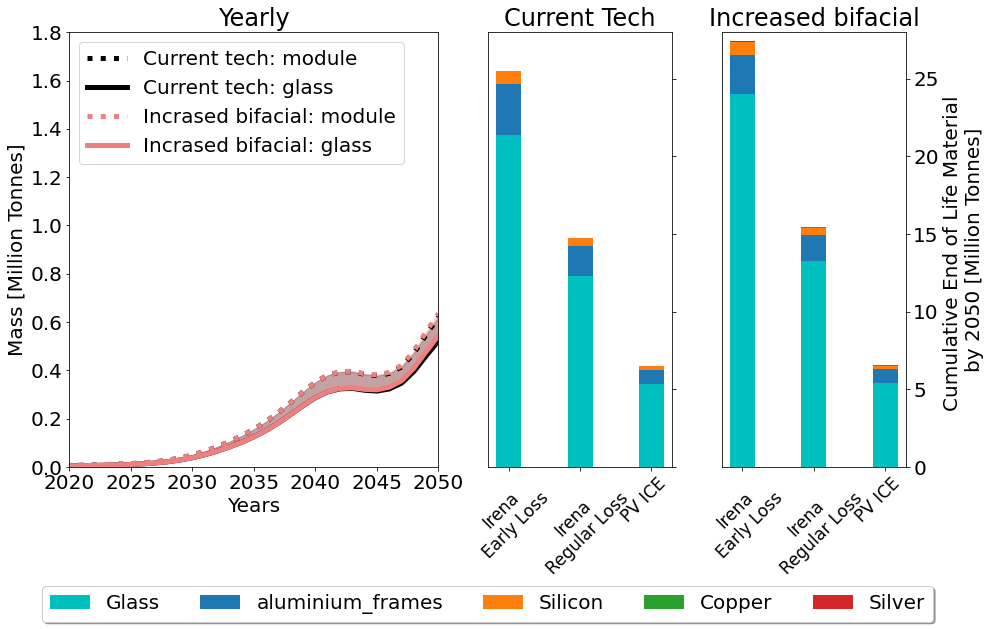

In [45]:
# PLOT FOR PAPER 


plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_EOL_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


#f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,0.8,0.8]})
f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [0.5,0.25,0.25]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'PV_ICE_Today'
name2 = 'PV_ICE_Bifacial'
#name3 = 'BifacialProjection'

# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k', linestyle='dotted', linewidth=5, label='Current tech: module')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='Current tech: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Incrased bifacial: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Incrased bifacial: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

'''
# SCENARIO 3 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name3]+USyearly[keyw+materials[1]+'_'+name3]+
            USyearly[keyw+materials[2]+'_'+name3]+USyearly[keyw+materials[3]+'_'+name3]+
            USyearly[keyw+materials[4]+'_'+name3])
glassmat = (USyearly[keyw+materials[0]+'_'+name3])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'g', linestyle='dotted', linewidth=5, label='Incrased bifacial: module')
a0.plot(USyearly.index, glassmat, 'g', linewidth=5, label='Bifacial Evolution: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

'''

#a0.title('Yearly')

a0.legend(loc=2)
a0.set_title('Yearly')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050.iloc[2] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_A.iloc[0]
dfcumulations2050.iloc[1] = dfcumulations2050_Prev_A.iloc[1]

dfcumulations2050_Prev_A = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.yaxis.set_ticklabels([]) 

#a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
a1.yaxis.set_ticklabels([]) 
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n'], color='black', rotation=45, fontsize=17)
plt.tick_params(axis='y', which='minor', bottom=False)
plt.title('Current Tech')



print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


########################    
# SUBPLOT 3
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


dfcumulations2050.iloc[2] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_B.iloc[0]
dfcumulations2050.iloc[1] = dfcumulations2050_Prev_B.iloc[1]

dfcumulations2050_Prev_B = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a2.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a2.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a2.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a2.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a2.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a2.yaxis.set_label_position("right")
a2.yaxis.tick_right()
a2.set_ylabel('Cumulative End of Life Material \nby 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a2.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a2.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'),
          bbox_to_anchor=(1.2, -0.25),
          fancybox=True, shadow=True, ncol=5)
a2.set_ylim([0, 28])

plt.sca(a2)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45, fontsize=17)
plt.tick_params(axis='y', which='minor', bottom=False)
plt.title('Increased bifacial')

f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly EoL Waste by SCenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



# Waste_ EOL + MFG

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:154: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:166: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


Cumulative Waste by EoL 2050 Million Tones by Scenario
Cumulative Waste by EoL 2050 Million Tones by Scenario


0    27.407558
1     0.000000
2     0.000000
dtype: float64

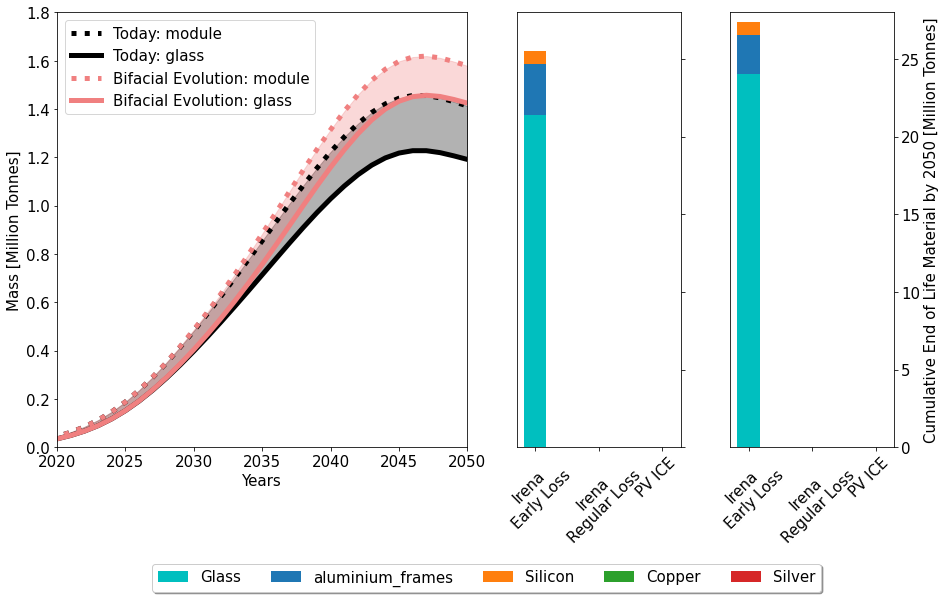

In [46]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,0.8,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'Irena_EL_Today'
name2 = 'Irena_EL_Bifacial'

# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k', linestyle='dotted', linewidth=5, label='Today: module')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='Today: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Bifacial Evolution: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Bifacial Evolution: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

a0.legend()
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050_Prev_A = dfcumulations2050.copy()


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
#a1.yaxis.set_visible(False)
a1.yaxis.set_ticklabels([]) 
#a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)



print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



########################    
# SUBPLOT 3
########################
#######################
# Calculate    


cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050_Prev_B = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a2.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a2.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a2.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a2.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a2.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a2.yaxis.set_label_position("right")
a2.yaxis.tick_right()
a2.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a2.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a2.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'),
          bbox_to_anchor=(0.6, -0.25),
          fancybox=True, shadow=True, ncol=5)
a2.set_ylim([0, 28])

plt.sca(a2)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)


f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly EoL Waste by SCenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:157: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:169: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


Cumulative Waste by EoL 2050 Million Tones by Scenario
Cumulative Waste by EoL 2050 Million Tones by Scenario


0    27.407558
1    15.436708
2     0.000000
dtype: float64

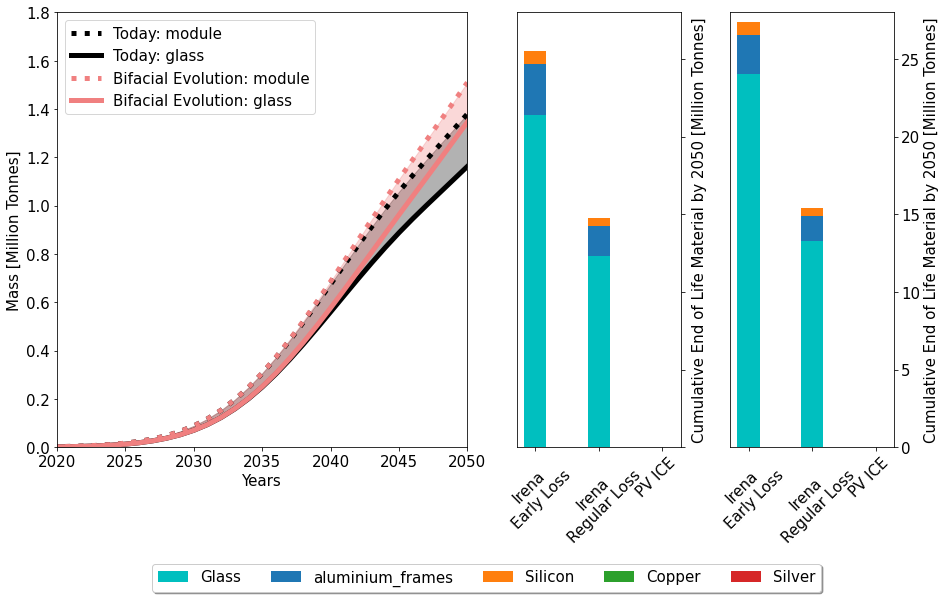

In [47]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,0.8,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'Irena_RL_Today'
name2 = 'Irena_RL_Bifacial'

# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k', linestyle='dotted', linewidth=5, label='Today: module')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='Today: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Bifacial Evolution: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Bifacial Evolution: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

a0.legend()
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050.iloc[1] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_A.iloc[0]

dfcumulations2050_Prev_A = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.yaxis.set_ticklabels([]) 
a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)



print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)

########################    
# SUBPLOT 3
########################
#######################
# Calculate    


cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


dfcumulations2050.iloc[1] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_B.iloc[0]

dfcumulations2050_Prev_B = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a2.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a2.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a2.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a2.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a2.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a2.yaxis.set_label_position("right")
a2.yaxis.tick_right()
a2.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a2.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a2.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'),
          bbox_to_anchor=(0.6, -0.25),
          fancybox=True, shadow=True, ncol=5)
a2.set_ylim([0, 28])

plt.sca(a2)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)


f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly EoL Waste by SCenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:164: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:176: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


Cumulative Waste by EoL 2050 Million Tones by Scenario
Cumulative Waste by EoL 2050 Million Tones by Scenario


0    27.407558
1    15.436708
2     8.253526
dtype: float64

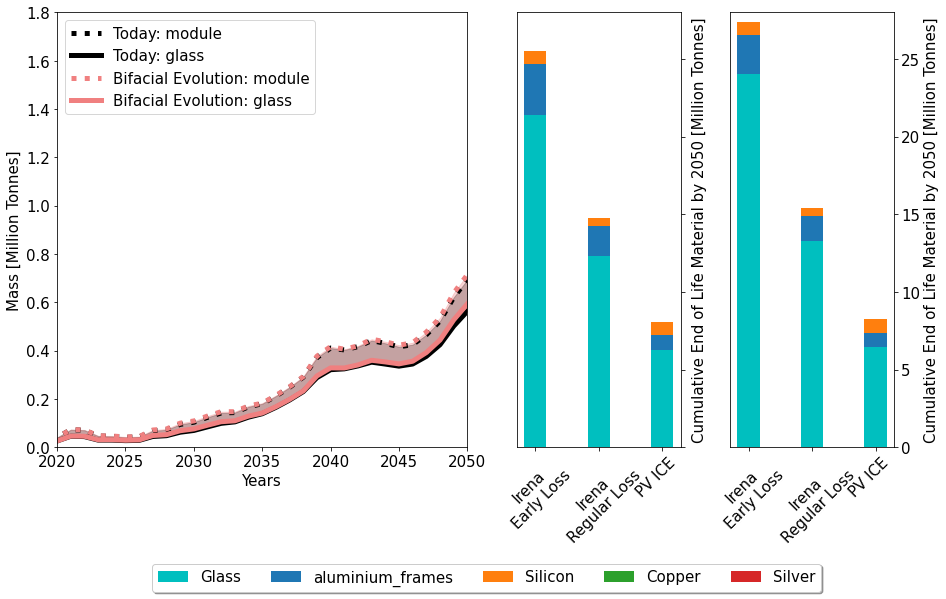

In [48]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,0.8,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'PV_ICE_Today'
name2 = 'PV_ICE_Bifacial'
#name3 = 'BifacialProjection'

# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k', linestyle='dotted', linewidth=5, label='Today: module')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='Today: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Bifacial Evolution: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Bifacial Evolution: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)


a0.legend(loc=2)
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050.iloc[2] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_A.iloc[0]
dfcumulations2050.iloc[1] = dfcumulations2050_Prev_A.iloc[1]

dfcumulations2050_Prev_A = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.yaxis.set_ticklabels([]) 

a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
a1.yaxis.set_ticklabels([]) 
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'Bifacial'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)



print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


########################    
# SUBPLOT 3
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


dfcumulations2050.iloc[2] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_B.iloc[0]
dfcumulations2050.iloc[1] = dfcumulations2050_Prev_B.iloc[1]

dfcumulations2050_Prev_B = dfcumulations2050.copy()


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a2.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a2.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a2.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a2.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a2.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a2.yaxis.set_label_position("right")
a2.yaxis.tick_right()
a2.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a2.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a2.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'),
          bbox_to_anchor=(0.6, -0.25),
          fancybox=True, shadow=True, ncol=5)
a2.set_ylim([0, 28])

plt.sca(a2)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'BIFACIAL.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)


f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly EoL Waste by SCenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



In [49]:
USyearly.keys()

Index(['Waste_glass_PV_ICE_Today', 'Waste_aluminium_frames_PV_ICE_Today',
       'Waste_silicon_PV_ICE_Today', 'Waste_silver_PV_ICE_Today',
       'Waste_copper_PV_ICE_Today', 'Waste_Module_PV_ICE_Today',
       'Waste_glass_PV_ICE_Bifacial', 'Waste_aluminium_frames_PV_ICE_Bifacial',
       'Waste_silicon_PV_ICE_Bifacial', 'Waste_silver_PV_ICE_Bifacial',
       ...
       'Waste_MFG_silicon_Bifacial_SameInstalls',
       'Waste_MFG_silver_Bifacial_SameInstalls',
       'Waste_MFG_copper_Bifacial_SameInstalls',
       'Waste_MFG_Module_Bifacial_SameInstalls',
       'VirginStock_glass_Bifacial_SameInstalls',
       'VirginStock_aluminium_frames_Bifacial_SameInstalls',
       'VirginStock_silicon_Bifacial_SameInstalls',
       'VirginStock_silver_Bifacial_SameInstalls',
       'VirginStock_copper_Bifacial_SameInstalls',
       'VirginStock_Module_Bifacial_SameInstalls'],
      dtype='object', length=198)

# BIFACIAL PROJECTION COMPARISON

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name2 = 'Bifacial_SameInstalls'
name3 = 'Bifacial_ReducedInstalls'

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Same Installs: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Same Installs: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

# SCENARIO 3 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name3]+USyearly[keyw+materials[1]+'_'+name3]+
            USyearly[keyw+materials[2]+'_'+name3]+USyearly[keyw+materials[3]+'_'+name3]+
            USyearly[keyw+materials[4]+'_'+name3])
glassmat = (USyearly[keyw+materials[0]+'_'+name3])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'gold', linestyle='dotted', linewidth=5, label='Reduced Installs: module')
a0.plot(USyearly.index, glassmat, 'gold', linewidth=5, label='Reduced Installs: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)


a0.legend(loc=2)
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name3].loc[2050])
    empty = 0
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
#a1.yaxis.set_ticklabels([]) 

a1.set_ylabel('Cumulative End of Life Material and MFG Scrap \n by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#a1.yaxis.set_ticklabels([]) 
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
#a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(2), ['Same\n Installs\n', 'Reduced\n Installs'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
change = dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


In [ ]:
print("Reduced Installs reduces EOL Material & MFG Scrap landfilled by {} % ".format(round((change[0] - change[1])*100/change[0],2)))



In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='VirginStock_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name2 = 'Bifacial_SameInstalls'
name3 = 'Bifacial_ReducedInstalls'


# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Same Installs: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Same Installs: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

# SCENARIO 3 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name3]+USyearly[keyw+materials[1]+'_'+name3]+
            USyearly[keyw+materials[2]+'_'+name3]+USyearly[keyw+materials[3]+'_'+name3]+
            USyearly[keyw+materials[4]+'_'+name3])
glassmat = (USyearly[keyw+materials[0]+'_'+name3])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'gold', linestyle='dotted', linewidth=5, label='Reduced Installs: module')
a0.plot(USyearly.index, glassmat, 'gold', linewidth=5, label='Reduced Installs: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)


a0.legend(loc=2)
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
#a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name3].loc[2050])
    empty = 0
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
#a1.yaxis.set_ticklabels([]) 

a1.set_ylabel('Cumulative Virgin Stock Needs [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#a1.yaxis.set_ticklabels([]) 
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
#a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(2), ['Same\n Installs\n', 'Reduced\n Installs'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
change1 = dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


In [ ]:
print("Reduction in Manufacturing needs for Reduced Installs of {} %".format(round((change1[0]-change1[1])*100/change1[0],2)))

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='VirginStock_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name2 = 'Bifacial_SameInstalls'
name3 = 'Bifacial_ReducedInstalls'


# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Irena Installs (no MFG losses): module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Irena Installs (no MFG losses):: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

# SCENARIO 3 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name3]+USyearly[keyw+materials[1]+'_'+name3]+
            USyearly[keyw+materials[2]+'_'+name3]+USyearly[keyw+materials[3]+'_'+name3]+
            USyearly[keyw+materials[4]+'_'+name3])
glassmat = (USyearly[keyw+materials[0]+'_'+name3])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'gold', linestyle='dotted', linewidth=5, label='Reduced Installs: module')
a0.plot(USyearly.index, glassmat, 'gold', linewidth=5, label='Reduced Installs: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)


a0.legend(loc=2)
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
#a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name3].loc[2050])
    empty = 0
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
#a1.yaxis.set_ticklabels([]) 

a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#a1.yaxis.set_ticklabels([]) 
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
#a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(2), ['\n Irena Installs \n(no MFG losses)) \n', 'Reduced\n Installs'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)

print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
change2 = dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


In [ ]:
print("Manufacturing Loss represents {} % of Virgin Stock Needs ".format(round((change1[0]-change2[0])*100/change1[0],2)))

# Installed Capacity

In [ ]:
filter_col_Capacity = [col for col in UScum if col.startswith('Capacity')]
filter_col_Capacity

In [ ]:
UScum[filter_col_Capacity].loc[2050]/1e12

In [ ]:
# Sanity Check
plt.plot(UScum['Capacity_Irena_EL_Today']/1e12, 'r', linewidth=4.0, label='Irena Early Loss')
plt.plot(UScum['Capacity_Irena_EL_Bifacial']/1e12, 'b.', linewidth=4.0, label='Irena Regular Loss')
print("No difference in Capacity between Today and Bifacial for Irena", sum(UScum['Capacity_Irena_EL_Today']/1e12-UScum['Capacity_Irena_EL_Bifacial']/1e12))

In [ ]:
"""
p1 = (UScum['new_Installed_Capacity_[MW]BifacialProjection']-
UScum['new_Installed_Capacity_[MW]BifacialProjection_p2'])

UScum['new_Installed_Capacity_[MW]SameInstalls_p2'] = UScum['new_Installed_Capacity_[MW]SameInstalls'] + p1

""" 
pass

In [ ]:
filter_col_newInstalls = [col for col in UScum if col.startswith('new_Installed_Capacity_[MW]')]
UScum[filter_col_newInstalls].loc[2050]/1e6

In [ ]:
list(UScum.keys())

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (7.5, 8)
keyw='Waste_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']

f, (a0) = plt.subplots(1, 1, gridspec_kw={'width_ratios': [2]})

plt.plot(UScum['new_Installed_Capacity_[MW]_Irena_EL']/1e6, 'k', label='Cumulative New Installs')
plt.plot(UScum['Capacity_Irena_EL_Bifacial']/1e12, 'r', linewidth=4.0, label='Irena EL Reliability')
plt.plot(UScum['Capacity_Irena_RL_Bifacial']/1e12, 'g', linewidth=4.0, label='Irena RL Reliability')#
plt.plot(UScum['Capacity_Bifacial_ReducedInstalls']/1e12, 'gold', linestyle='dashed', linewidth=4.0, label='PV ICE Reduced Installs')
plt.plot(UScum['Capacity_Bifacial_SameInstalls']/1e12, 'lightcoral', linewidth=4.0, label='PV ICE Reliability')

plt.legend()
#plt.yscale('log')
plt.xlim([2020, 2050])
#plt.ylim([5e10, 1e12])
plt.ylabel('Installed Capacity [TW]')


In [ ]:
print("Nameplate Capcaity of Bifacial Installations augment by", (UScum['Capacity_Bifacial_SameInstalls'][2050]-UScum['Capacity_Bifacial_ReducedInstalls'][2050])*100/UScum['Capacity_Bifacial_SameInstalls'][2050])

In [ ]:
print("% loss with Irena EL ")
((UScum['new_Installed_Capacity_[MW]_Irena_EL'].loc[2050]/1e6)-(UScum['Capacity_Irena_EL_Bifacial'].loc[2050]/1e12))*100/(UScum['new_Installed_Capacity_[MW]_Irena_EL'].loc[2050]/1e6)


In [ ]:
print("% loss with Irena RL ")
((UScum['new_Installed_Capacity_[MW]_Irena_RL'].loc[2050]/1e6)-(UScum['Capacity_Irena_RL_Bifacial'].loc[2050]/1e12))*100/(UScum['new_Installed_Capacity_[MW]_Irena_RL'].loc[2050]/1e6)

In [ ]:
print("% loss with PV ICE, Reducing Bifacial Installs ")
((UScum['new_Installed_Capacity_[MW]_Irena_RL'].loc[2050]/1e6)-(UScum['Capacity_Bifacial_ReducedInstalls'].loc[2050]/1e12))*100/(UScum['new_Installed_Capacity_[MW]_Irena_RL'].loc[2050]/1e6)


In [ ]:
print("% loss with PV ICE, Keeping Bifacial Installs ")
((UScum['new_Installed_Capacity_[MW]_Irena_RL'].loc[2050]/1e6)-(UScum['Capacity_Bifacial_SameInstalls'].loc[2050]/1e12))*100/(UScum['new_Installed_Capacity_[MW]_Irena_RL'].loc[2050]/1e6)


# WEIBULL PLOTS

In [ ]:
from matplotlib.pyplot import gca,show

In [ ]:
firstgen = r1.scenario['Today'].data.WeibullParams.iloc[0]
ares = PV_ICE.weibull_cdf_vis(firstgen['alpha'],firstgen['beta'])

twentythirtygen = firstgen = r1.scenario['Today'].data.WeibullParams.iloc[-1]
bres = PV_ICE.weibull_cdf_vis(twentythirtygen['alpha'],twentythirtygen['beta'])

#userWeibulls = {'alpha': 3.4,
#               'beta': 4.5}
#userres = PV_ICE.weibull_cdf_vis(userWeibulls['alpha'],userWeibulls['beta'])

# Irena 'EL' 2016
alpha = 2.4928
Lifetime = 30
IrenaEarly = PV_ICE.weibull_cdf_vis(alpha, beta=Lifetime)

# Irena 'RL' 2016
alpha = 5.3759
Lifetime = 30
IrenaReg = PV_ICE.weibull_cdf_vis(alpha, beta=Lifetime)


In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (10, 8)
    
#plt.plot(ares, label=r'$ \alpha $ : '+str(round(firstgen['alpha'],2))+ r' $ \beta $ : '+ str(round(firstgen['beta'],2)) + ' PV ICE, gen 1995')
#plt.plot(bres, color='b', label=r'$ \alpha $ : '+str(round(twentythirtygen['alpha'],2))+ r' $ \beta $ : '+ str(round(twentythirtygen['beta'],2)) + ' PV ICE, gen 2050')
plt.plot(IrenaEarly, color='red', linewidth=16.0, label=r'$ \alpha $ : 2.49, Early Loss Baseline Irena 2016')
#plt.plot(IrenaReg, color='orange', linewidth=4.0, label=r'$ \alpha $ : 5.3759, Regular Loss Baseline Irena 2016')
#plt.legend()
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.xlabel('Years since install')
plt.xlim([0,50])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='bottom');


In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (10, 8)
    
#plt.plot(ares, label=r'$ \alpha $ : '+str(round(firstgen['alpha'],2))+ r' $ \beta $ : '+ str(round(firstgen['beta'],2)) + ' PV ICE, gen 1995')
#plt.plot(bres, color='b', label=r'$ \alpha $ : '+str(round(twentythirtygen['alpha'],2))+ r' $ \beta $ : '+ str(round(twentythirtygen['beta'],2)) + ' PV ICE, gen 2050')
#plt.plot(IrenaEarly, color='red', linewidth=4.0, label=r'$ \alpha $ : 2.49, Early Loss Baseline Irena 2016')
plt.plot(IrenaReg, color='darkgreen', linewidth=16.0, label=r'$ \alpha $ : 5.3759, Regular Loss Baseline Irena 2016')
#plt.legend()
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.xlabel('Years since install')
plt.xlim([0,50])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='bottom');


In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (10, 8)
    
plt.plot(ares, linewidth=16.0, label=r'$ \alpha $ : '+str(round(firstgen['alpha'],2))+ r' $ \beta $ : '+ str(round(firstgen['beta'],2)) + ' PV ICE, gen 1995')
plt.plot(bres, linewidth=16.0, color='b', label=r'$ \alpha $ : '+str(round(twentythirtygen['alpha'],2))+ r' $ \beta $ : '+ str(round(twentythirtygen['beta'],2)) + ' PV ICE, gen 2050')
#plt.plot(IrenaEarly, color='red', linewidth=4.0, label=r'$ \alpha $ : 2.49, Early Loss Baseline Irena 2016')
#plt.plot(IrenaReg, color='orange', linewidth=4.0, label=r'$ \alpha $ : 5.3759, Regular Loss Baseline Irena 2016')
#plt.legend()
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.xlabel('Years since install')
plt.xlim([0,50])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


opt = dict(color='r',width=12, headwidth=60, headlength=60)

gca().annotate('',xy=(38,0.5), xycoords='data',xytext =(18,0.5),textcoords = 'data',arrowprops=opt)

#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='bottom');


# SAVE RESULTS OPENEI

In [ ]:
# WORK ON THIS FOIR OPENEI

keyw=['mat_Virgin_Stock','mat_Total_EOL_Landfilled','mat_Total_MFG_Landfilled', 'mat_Total_Landfilled', 
      'new_Installed_Capacity_[MW]','Installed_Capacity_[W]']
keywprint = ['VirginMaterialDemand','EOLMaterial', 'ManufacturingScrap','ManufacturingScrapAndEOLMaterial',
             'NewInstalledCapacity','InstalledCapacity'] 
keywunits = ['MetricTonnes', 'MetricTonnes', 'MetricTonnes', 'MetricTonnes', 
            'MW','MW']
keywdcumneed = [True,True,True,True,
                True,False]
keywdlevel = ['material','material','material','material',
             'module','module']
keywscale = [1000000, 1000000, 1000000, 1000000,
            1,1e6]
#materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']
materials = ['glass','aluminium_frames','silver','silicon', 'copper']

# Loop over SF Scenarios

scenariolist = pd.DataFrame()

# Loop over Simularionts r1 r2, r3... 
for kk in range(3, len(Simulations)):
    obj = Simulations[kk]

    # Loop over Scenarios
    for zz in range(0, len(obj.scenario)):
        case = list(obj.scenario.keys())[zz]
        
        foo = pd.DataFrame()
        for jj in range (0, len(keyw)):

            if keywdlevel[jj] == 'material':
                for ii in range (0, len(materials)):    
                    sentit = '@value|'+keywprint[jj]+'|'+materials[ii].capitalize() +'#'+keywunits[jj]
                    foo[sentit] = obj.scenario[case].material[materials[ii]].materialdata[keyw[jj]]/keywscale[jj] 
            
            else:
                sentit = '@value|'+keywprint[jj]+'|'+'PV' +'#'+keywunits[jj]
                #sentit = '@value|'+keywprint[jj]+'#'+keywunits[jj]
                foo[sentit] = obj.scenario[case].data[keyw[jj]]/keywscale[jj] 



        foo['@case'] = case
        foo['@scenario|Module Composition'] = obj.name
        foo['@timeseries|Year'] = obj.scenario[case].data.year

        scenariolist = scenariolist.append(foo)   

cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
#scenariolist = scenariolist/1000000 # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv('OPENEI 4 - Nation by Year.csv', index=False)

print("Done")

### UNFINISHED FOR OPENEI STARTING HERE

In [ ]:
ReliabilityApproach=['Irena_RL', 'Irena_EL', 'PV_ICE', 'Bifacial_ReducedInstalls', 'Bifacial_SameInstalls']

ReliabilityApproachandScenario=['Irena_RL_Today', 'Irena_RL_Bifacial',
                                'Irena_EL_Today', 'Irena_EL_Bifacial',
                                'PV_ICE_Today','PV_ICE_Today', 
                                'Bifacial_ReducedInstalls', 
                                'Bifacial_SameInstalls']
TodayModuleComposition = ['Irena_RL_Today', 'Irena_EL_Today', 'PV_ICE_Today']
BifacialModuleComposition = ['Irena_RL_Bifacial', 'Irena_EL_Bifacial', 'Bifacial_SameInstalls', 'Bifacial_ReducedInstalls']

In [ ]:
# WORK ON THIS FOIR OPENEI

keyw=['VirginStock','Waste_EOL','Waste_MFG', 'Waste', 
      'new_Installed_Capacity_[MW]','Capacity']
keywprint = ['VirginMaterialDemand','EOLMaterial', 'ManufacturingScrap','ManufacturingScrapAndEOLMaterial',
             'NewInstalledCapacity','InstalledCapacity'] 
keywunits = ['MetricTonnes', 'MetricTonnes', 'MetricTonnes', 'MetricTonnes', 
            'MW','MW']
keywdcumneed = [True,True,True,True,
                True,False]
keywdlevel = ['material','material','material','material',
             'module','module']
keywscale = [1000000, 1000000, 1000000, 1000000,
            1,1e6]
#materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']
materials = ['glass','aluminium_frames','silver','silicon', 'copper','Module']

# Loop over SF Scenarios

scenariolist = pd.DataFrame()

# Loop over Simularionts r1 r2, r3... 
for kk in range(3, len(TodayModuleComposition)):
    obj = Simulations[kk]

        
        foo = pd.DataFrame()
        for jj in range (0, len(keyw)):

            if keywdlevel[jj] == 'material':
                for ii in range (0, len(materials)):    
                    sentit = '@value|'+keywprint[jj]+'|'+materials[ii].capitalize() +'#'+keywunits[jj]
                    foo[sentit] = obj.scenario[case].material[materials[ii]].materialdata[keyw[jj]]/keywscale[jj] 
            
            else:
                sentit = '@value|'+keywprint[jj]+'|'+'PV' +'#'+keywunits[jj]
                #sentit = '@value|'+keywprint[jj]+'#'+keywunits[jj]
                foo[sentit] = obj.scenario[case].data[keyw[jj]]/keywscale[jj] 



        foo['@case'] = case
        foo['@scenario|Solar Futures'] = obj.name
        foo['@timeseries|Year'] = obj.scenario[case].data.year

        scenariolist = scenariolist.append(foo)   

cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
#scenariolist = scenariolist/1000000 # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv('OPENEI 4 - Nation by Year.csv', index=False)

print("Done")

In [ ]:
"""
colNames = result.columns[result.columns.str.contains('|ManufacturingScrap|')] 
result['@value|ManufacturingScrap|Module#MetricTonnes'] = result[colNames].sum(axis=1)

mask = df1['@scenario|Solar Futures']=='SameInstalls'
df1 = df1[~mask]

df1.rename(columns={'@scenario|Solar Futures': '@scenario|Module Composition Scenario'}, inplace=True)

"""

@scenario   @ timeseries    @ value|VirginMateiralDemand|Glass#MEtric Tonnes ........
PVV_ICE             2020
PV_ICE               2030